In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, BatchNormalization
from tensorflow.keras.layers import ReLU, AvgPool2D, Flatten, Dense
import PIL
from PIL import ImageOps
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

# workstation used
ans = input('self or lab: ')
if ans == 'self':
    idi = '/home/neo11/Documents'
    print('using neo11')
else:
    idi = '/home/melcher/Documents/Nihal'
    print('using melcher')

self or lab: self
using neo11


In [12]:
# paramters
# stride 1
s1 = 1
# stride 2
s2 = 2

# input image size for 1 color(a*b)
a =128
b = 128

# type of image
g = 1 # grayscale
rgb =3 # RGB image 

# no. of filters
f1 = 16
f2 = 32

# kernel size
n = 5
m =3
n1 =4

#padding
p =2

# epochs
epochs = 100

#initial learning rate
lr = 0.001

In [26]:
image_size = (a,b)
batch_size = 16

dataset_path = '/home/neo11/Documents/ML in microfluids/converted/train' # '/content/drive/MyDrive/ML in microfluids/trd'
testing_path = '/home/neo11/Documents/ML in microfluids/converted/test' # '/content/drive/MyDrive/ML in microfluids/cvd'

# data generator
train_datagen =ImageDataGenerator(rescale = 1/255, validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale = 1/255)

train_batches = train_datagen.flow_from_directory(
    dataset_path,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'binary',
    subset = 'training',
    color_mode = 'grayscale'
)

validation_batches = train_datagen.flow_from_directory(
    dataset_path,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'binary',
    subset = 'validation',
    color_mode = 'grayscale'
)

test_batches = test_datagen.flow_from_directory(
    testing_path,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'binary',
    subset = 'training',
    color_mode = 'grayscale'
)

Found 318 images belonging to 2 classes.
Found 79 images belonging to 2 classes.
Found 70 images belonging to 2 classes.


In [4]:
# printing n images from the batches
n =4

def plot(img_arr):
  fig, axes = plt.subplots(1,n)
  axes = axes.flatten()
  for img, ax in zip(img_arr, axes):
    ax.imshow(img, cmap ='gray')
    ax.axis('off')
  plt.tight_layout()
  plt.show()

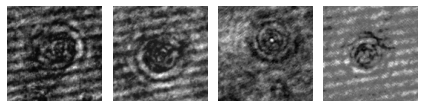

[1. 1. 1. 1.]


In [5]:
# for training batches
imgs, labels = train_batches[5]
plot(imgs)
print(labels[:n])

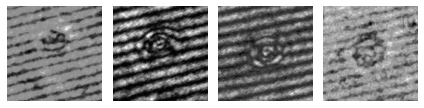

[0. 1. 1. 0.]


In [6]:
# for validation batches
imgs, labels = validation_batches[1]
plot(imgs)
print(labels[:n])

In [ ]:
# 11 layer model

model = Sequential()

model.add(layers.Conv2D(2*f2, (n1, n1), (s1, s1), activation = 'relu', padding = 'same',input_shape =(128,128,1)))

model.add(layers.Conv2D(1.5*f2, (n1, n1), (s1, s1), activation = 'relu'))

model.add(layers.Conv2D(f2, (m, m), (s1, s1), activation = 'tanh', padding = 'valid'))

model.add(layers.MaxPooling2D(2))

model.add(layers.Conv2D(f2, (n, n), activation="sigmoid", padding ='same'))

model.add(layers.Conv2D(f1, (n, n), activation="sigmoid", padding = 'valid'))

model.add(layers.MaxPooling2D(2))

model.add(layers.Conv2D(f1, (n, n), activation="tanh", padding = 'valid'))

model.add(layers.GlobalMaxPooling2D())

model.add(tf.keras.layers.Flatten())

model.add(layers.Dense(8, activation = 'sigmoid'))

x = model.output
output = Dense(units = 2, activation = 'softmax')(x)

model = Model(inputs = model.input, outputs = output)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 128, 128, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 64)      1088      
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 48)      49200     
                                                                 
 conv2d_2 (Conv2D)           (None, 123, 123, 32)      13856     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 61, 61, 32)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 32)        16416     
                                                             

2022-06-20 03:01:29.878693: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-06-20 03:01:29.878732: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (inspiron-5402): /proc/driver/nvidia/version does not exist
2022-06-20 03:01:29.883865: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [32]:
# 13 layer model
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(64, (5,5), activation = 'relu', input_shape= (128,128,1)),
                                    tf.keras.layers.Conv2D(48,(4,4),(2,2), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', padding = 'same'),
                                    tf.keras.layers.Conv2D(32, (3,3), activation = 'tanh', padding = 'valid'),
                                    tf.keras.layers.Conv2D(32, (5,5), activation = 'tanh', padding = 'valid'),
                                    tf.keras.layers.Conv2D(16, (5,5), activation = 'tanh', padding = 'valid'),
                                    tf.keras.layers.Conv2D(16, (4,4), (2,2), activation = 'tanh', padding = 'same'),
                                    tf.keras.layers.Conv2D(16, (3,3), activation = 'tanh', padding = 'same'),
                                    tf.keras.layers.AveragePooling2D(pool_size = (2, 2)),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(29, activation = 'tanh'),
                                    tf.keras.layers.Dense(17, activation = 'sigmoid')
])

x = model.output
output = Dense(units = 2, activation = 'softmax')(x)

model = Model(inputs = model.input, outputs = output)

model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40_input (InputLayer  [(None, 128, 128, 1)]    0         
 )                                                               
                                                                 
 conv2d_40 (Conv2D)          (None, 124, 124, 64)      1664      
                                                                 
 conv2d_41 (Conv2D)          (None, 61, 61, 48)        49200     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 30, 30, 48)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 30, 30, 32)        13856     
                                                                 
 conv2d_43 (Conv2D)          (None, 28, 28, 32)        9248

In [22]:
# learning rate decay
decay_steps = 10
decay_rate = 0.001

dlr = tf.keras.optimizers.schedules.ExponentialDecay(
    lr/10, decay_steps, decay_rate, staircase=False, name=None)

In [27]:
model.compile(optimizer=Adam(learning_rate = 0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(
    train_batches,
    validation_data = validation_batches,
    epochs = epochs//2,
    steps_per_epoch=len(train_batches),           # no. of batches in an epoch
    validation_steps = len(validation_batches)
)

Epoch 1/50
20/20 [==============================] - 6s 272ms/step - loss: 0.1474 - accuracy: 0.9560 - val_loss: 0.0816 - val_accuracy: 0.9747
Epoch 2/50
20/20 [==============================] - 5s 258ms/step - loss: 0.0929 - accuracy: 0.9748 - val_loss: 0.0483 - val_accuracy: 0.9873
Epoch 3/50
20/20 [==============================] - 5s 256ms/step - loss: 0.0759 - accuracy: 0.9843 - val_loss: 0.0464 - val_accuracy: 1.0000
Epoch 4/50
20/20 [==============================] - 5s 260ms/step - loss: 0.0969 - accuracy: 0.9748 - val_loss: 0.0664 - val_accuracy: 0.9747
Epoch 5/50
20/20 [==============================] - 6s 280ms/step - loss: 0.0664 - accuracy: 0.9874 - val_loss: 0.0355 - val_accuracy: 1.0000
Epoch 6/50
20/20 [==============================] - 6s 293ms/step - loss: 0.0590 - accuracy: 0.9937 - val_loss: 0.0389 - val_accuracy: 1.0000
Epoch 7/50
20/20 [==============================] - 5s 257ms/step - loss: 0.0528 - accuracy: 0.9906 - val_loss: 0.0327 - val_accuracy: 1.0000
Epoch 

In [31]:
testing_path = '/home/neo11/Documents/ML in microfluids/converted_test'
test_batches = test_datagen.flow_from_directory(
    testing_path,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'binary',
    subset = 'training',
    color_mode = 'grayscale'
)
test_loss, test_accuracy = model.evaluate(test_batches, steps=len(test_batches))

Found 150 images belonging to 2 classes.
10/10 [==============================] - 1s 99ms/step - loss: 0.8875 - accuracy: 0.8067


5/5 [==============================] - 1s 86ms/step - loss: 0.0319 - accuracy: 1.0000
Test loss = 0
Test accuracy = 1


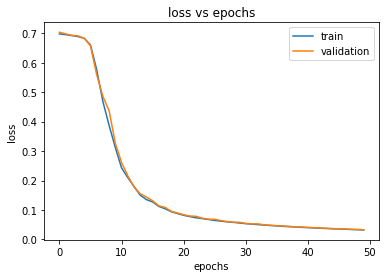

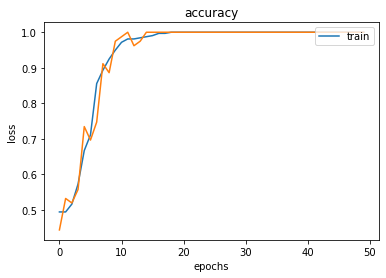

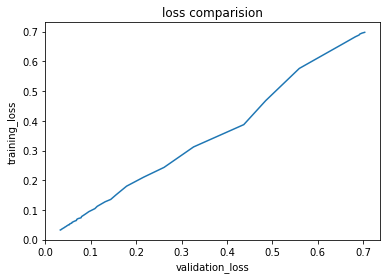

In [25]:
test_loss, test_accuracy = model.evaluate(test_batches, steps=len(test_batches))

print("Test loss = %d" % (test_loss))
print("Test accuracy = %d" % (test_accuracy))

# plotting training and validtition loss vs epochs
plt.plot(history.history['loss'], label = ['train'])
plt.plot(history.history['val_loss'], label =['validation'])
plt.title('loss vs epochs')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'validation'],loc='upper right')
plt.show()

# plotting training and validtition accuracy vs epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train'],loc='upper right')
plt.show()

# plotting training vs validtition loss
plt.plot(history.history['val_loss'],history.history['loss'])
plt.title('loss comparision')
plt.ylabel('training_loss')
plt.xlabel('validation_loss')
plt.show()

5/5 [==============================] - 0s 77ms/step - loss: 0.0776 - accuracy: 1.0000
Test loss = 0
Test accuracy = 1


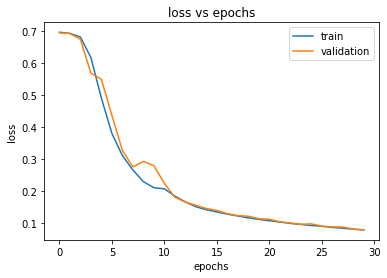

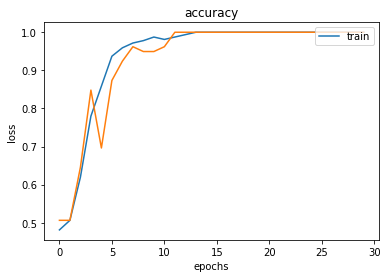

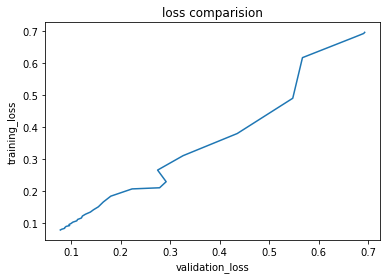

In [10]:
test_loss, test_accuracy = model.evaluate(test_batches, steps=len(test_batches))

print("Test loss = %d" % (test_loss))
print("Test accuracy = %d" % (test_accuracy))

# plotting training and validtition loss vs epochs
plt.plot(history.history['loss'], label = ['train'])
plt.plot(history.history['val_loss'], label =['validation'])
plt.title('loss vs epochs')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'validation'],loc='upper right')
plt.show()

# plotting training and validtition accuracy vs epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'validation'],loc='lower right')
plt.show()

# plotting training vs validtition loss
plt.plot(history.history['val_loss'],history.history['loss'])
plt.title('loss comparision')
plt.ylabel('training_loss')
plt.xlabel('validation_loss')
plt.show()

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(
    train_batches,
    validation_data = validation_batches,
    epochs =30,
    steps_per_epoch=len(train_batches),           # no. of batches in an epoch
    validation_steps = len(validation_batches)
)

Epoch 1/30
20/20 [==============================] - 6s 273ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 2/30
20/20 [==============================] - 5s 264ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 3/30
20/20 [==============================] - 6s 277ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0591 - val_accuracy: 0.9873
Epoch 4/30
20/20 [==============================] - 5s 261ms/step - loss: 0.1270 - accuracy: 0.9780 - val_loss: 0.1912 - val_accuracy: 0.9494
Epoch 5/30
20/20 [==============================] - 5s 270ms/step - loss: 0.0242 - accuracy: 0.9969 - val_loss: 0.1310 - val_accuracy: 0.9747
Epoch 6/30
20/20 [==============================] - 6s 277ms/step - loss: 0.0067 - accuracy: 0.9969 - val_loss: 0.1279 - val_accuracy: 0.9620
Epoch 7/30
20/20 [==============================] - 5s 262ms/step - loss: 0.0549 - accuracy: 0.9811 - val_loss: 0.3454 - val_accuracy: 0.9367
Epoch 

In [ ]:
test_loss, test_accuracy = model.evaluate(test_batches, steps=len(test_batches))

print("Test loss = %d" % (test_loss))
print("Test accuracy = %d" % (test_accuracy))

5/5 [==============================] - 1s 89ms/step - loss: 0.0012 - accuracy: 1.0000
Test loss = 0
Test accuracy = 1


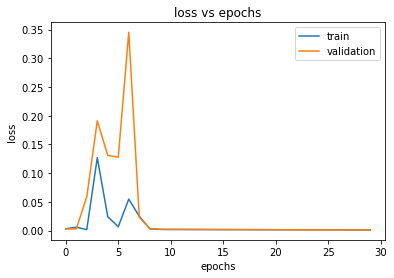

In [ ]:
# plotting training and validtition loss vs epochs
plt.plot(history.history['loss'], label = ['train'])
plt.plot(history.history['val_loss'], label =['validation'])
plt.title('loss vs epochs')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'validation'],loc='upper right')
plt.show()

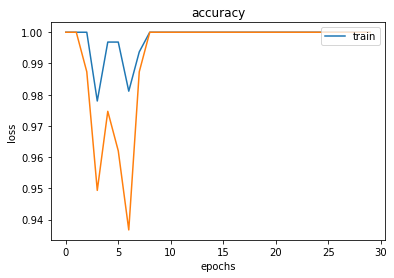

In [ ]:
# plotting training and validtition accuracy vs epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train'],loc='upper right')
plt.show()

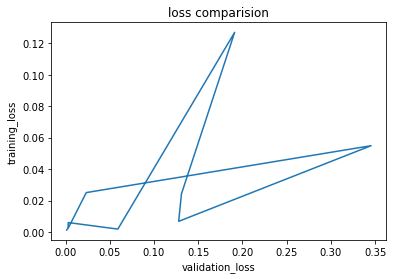

In [ ]:
# plotting training vs validtition loss
plt.plot(history.history['val_loss'],history.history['loss'])
plt.title('loss comparision')
plt.ylabel('training_loss')
plt.xlabel('validation_loss')
plt.show()

In [18]:
print(train_batches.class_indices)
print(test_batches.class_indices)

print("[1, 0] is cell")
print("[0, 1] is complementary")

{'Cell': 0, 'comp': 1}
{'cell': 0, 'comp': 1}
[1, 0] is cell
[0, 1] is complementary


In [24]:
# predicting for the model
pred=model.predict(test_batches, steps=len(test_batches))

5/5 [==============================] - 0s 86ms/step


In [ ]:
test_dir = '/home/neo11/Documents/ML in microfluids/dataset/test/test_cell'
j = 0
for i in os.listdir(test_dir):
    img = image.load_img(test_dir +'/' + i)
    arr = np.array(img)
    a = tf.image.rgb_to_grayscale(arr)
    b = np.reshape(a,(128,128))
    val = model.predict(a)
    print(val)
    plt.imshow(b, cmap = "gray")
    plt.show()

2022-06-20 04:33:05.925416: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-06-20 04:33:05.925455: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (inspiron-5402): /proc/driver/nvidia/version does not exist
2022-06-20 04:33:05.926449: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


NameError: name 'model' is not defined

In [16]:
l = []
img = PIL.Image.open('train_cell.png')
arr = np.array(img)
a = tf.image.rgb_to_grayscale(arr)
l.append(a)
l = np.array(l)
print(np.round(model.predict(l)))

1/1 [==============================] - 0s 32ms/step
[[1. 0.]]


In [17]:
l = []
img = PIL.Image.open('train_comp.png')
arr = np.array(img)
a = tf.image.rgb_to_grayscale(arr)
l.append(a)
l = np.array(l)
print(model.predict(l))

1/1 [==============================] - 0s 32ms/step
[[0.02432586 0.9756741 ]]


In [40]:
def identifier(array):
    l = []
    n= array.shape[0]
    for e in array:
        if e[0] == max(e):
            l.append('interested cell')
        else:
            l.append('complementary particle')
    return l

In [33]:
!mkdir -p saved_model
model.save('14_layer_GRAY')

INFO:tensorflow:Assets written to: 14_layer_GRAY/assets


INFO:tensorflow:Assets written to: 14_layer_GRAY/assets


In [44]:
# test data set 3
image_size = (128,128)
batch_size = 16

testing_path = '/home/neo11/Documents/ML in microfluids/dataset_test'
test_datagen = ImageDataGenerator(rescale = 1/255)
test_batches = test_datagen.flow_from_directory(
    testing_path,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'binary',
    subset = 'training',
    color_mode = 'grayscale'
)

test_loss, test_accuracy = model.evaluate(test_batches, steps=len(test_batches))

Found 150 images belonging to 2 classes.
10/10 [==============================] - 1s 98ms/step - loss: 0.7352 - accuracy: 0.8067


Pre-processed image

In [50]:
image_size = (a,b)
batch_size = 16

dataset_path = '/home/neo11/Documents/ML in microfluids/converted/train' # '/content/drive/MyDrive/ML in microfluids/trd'
testing_path = '/home/neo11/Documents/ML in microfluids/converted/test' # '/content/drive/MyDrive/ML in microfluids/cvd'

# data generator
train_datagen =ImageDataGenerator(rescale = 1/255, validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale = 1/255)

train_batches = train_datagen.flow_from_directory(
    dataset_path,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'binary',
    subset = 'training'
)

validation_batches = train_datagen.flow_from_directory(
    dataset_path,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'binary',
    subset = 'validation'
)

test_batches = test_datagen.flow_from_directory(
    testing_path,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'binary',
    subset = 'training'
)

Found 318 images belonging to 2 classes.
Found 79 images belonging to 2 classes.
Found 70 images belonging to 2 classes.


In [51]:
model.compile(optimizer=Adam(learning_rate =0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(
    train_batches,
    validation_data = validation_batches,
    epochs = epochs//2,
    steps_per_epoch=len(train_batches),           # no. of batches in an epoch
    validation_steps = len(validation_batches)
)

TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
test_loss, test_accuracy = model.evaluate(test_batches, steps=len(test_batches))

print("Test loss = %d" % (test_loss))
print("Test accuracy = %d" % (test_accuracy))

# plotting training and validtition loss vs epochs
plt.plot(history.history['loss'], label = ['train'])
plt.plot(history.history['val_loss'], label =['validation'])
plt.title('loss vs epochs')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'validation'],loc='upper right')
plt.show()

# plotting training and validtition accuracy vs epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train'],loc='upper right')
plt.show()

# plotting training vs validtition loss
plt.plot(history.history['val_loss'],history.history['loss'])
plt.title('loss comparision')
plt.ylabel('training_loss')
plt.xlabel('validation_loss')
plt.show()